In [8]:
#import the packages
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
today = date.today()
ticker1 = 'TQQQ' 
start_date = '2014-01-02'
end = today
df = pdr.get_data_yahoo(ticker1, start_date, end, interval='1mo')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-01,2.407917,2.857500,2.208333,2.794167,2.697577,985816800
2014-03-01,2.718333,2.892083,2.453333,2.560417,2.471908,1496923200
2014-04-01,2.601667,2.740417,2.174167,2.508333,2.421624,2643266400
2014-05-01,2.519583,2.861667,2.347500,2.847083,2.748664,1482350400
2014-06-01,2.858333,3.140000,2.785000,3.115833,3.008124,1018502400
...,...,...,...,...,...,...
2024-08-01,68.580002,73.160004,48.799999,68.610001,68.389755,1469084800
2024-09-01,66.349998,75.070000,56.720001,72.489998,72.257301,1071837000
2024-10-01,72.279999,77.459999,67.699997,69.449997,69.449997,1027385900


In [17]:
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if df['Close'][j] >= df['Close'][i] * 2:
            print('The stock price of', ticker1, 'doubled from', df.index[i], 'to', df.index[j], 'in', j-i, 'months.')
            break
    

The stock price of TQQQ doubled from 2014-02-01 00:00:00 to 2017-01-01 00:00:00 in 35 months.
The stock price of TQQQ doubled from 2014-03-01 00:00:00 to 2016-09-01 00:00:00 in 30 months.
The stock price of TQQQ doubled from 2014-04-01 00:00:00 to 2015-07-01 00:00:00 in 15 months.
The stock price of TQQQ doubled from 2014-05-01 00:00:00 to 2017-01-01 00:00:00 in 32 months.
The stock price of TQQQ doubled from 2014-06-01 00:00:00 to 2017-02-01 00:00:00 in 32 months.
The stock price of TQQQ doubled from 2014-07-01 00:00:00 to 2017-02-01 00:00:00 in 31 months.
The stock price of TQQQ doubled from 2014-08-01 00:00:00 to 2017-04-01 00:00:00 in 32 months.
The stock price of TQQQ doubled from 2014-09-01 00:00:00 to 2017-03-01 00:00:00 in 30 months.
The stock price of TQQQ doubled from 2014-10-01 00:00:00 to 2017-04-01 00:00:00 in 30 months.
The stock price of TQQQ doubled from 2014-11-01 00:00:00 to 2017-05-01 00:00:00 in 30 months.
The stock price of TQQQ doubled from 2014-12-01 00:00:00 to 

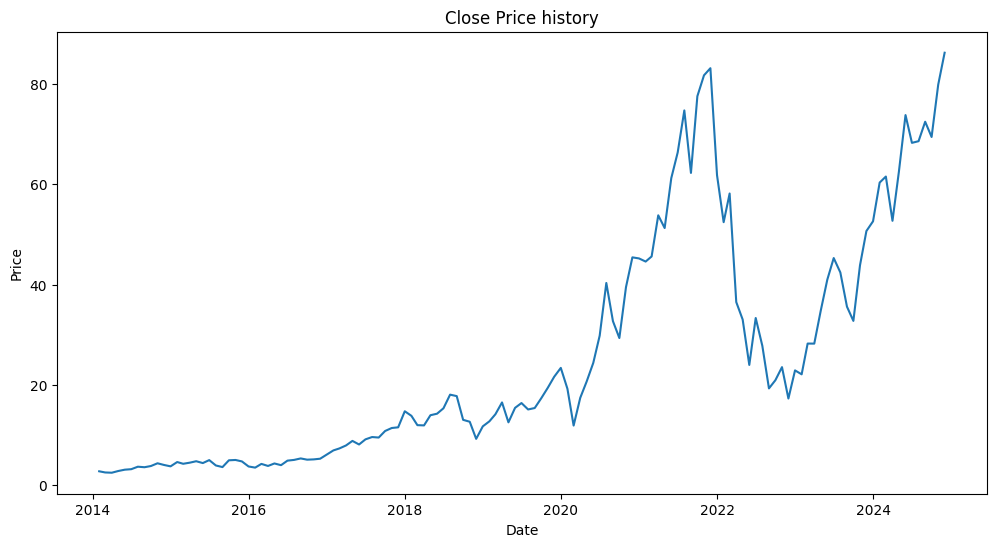

In [25]:
# importar matplotlib y graficar los close
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price history')
plt.title('Close Price history')
plt.xlabel('Date')
plt.ylabel('Price')
#plt.legend()
plt.show()
